In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.preprocessing import MultiLabelBinarizer
from matplotlib_venn import venn3
import matplotlib.ticker as ticker
import numpy as np


OSError: Could not find kaggle.json. Make sure it's located in /Users/sa21/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [86]:
# Load data into DataFrame
df = pd.read_csv('/Users/sa21/Desktop/Data_Analyst_Job_Trends/data/raw/Data_search_jobs.csv')
df.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,15 hours ago,Full-time,True,101K–143K a year,data analyst,2023-08-04 03:00:13.797776,United States,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['tableau', 'r', 'python', 'sql']"
1,1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,NaN,NaN,data analyst,2023-08-04 03:00:13.797776,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,18 hours ago,Full-time,NaN,NaN,data analyst,2023-08-04 03:00:13.797776,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql']
3,3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,12 hours ago,Contractor,True,15–25 an hour,data analyst,2023-08-04 03:00:13.797776,United States,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['powerpoint', 'excel', 'power_bi']"
4,4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,7 hours ago,Contractor,NaN,90K–110K a year,data analyst,2023-08-04 03:00:13.797776,United States,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['powerpoint', 'excel', 'outlook', 'word']"


In [87]:
columns_names = df.columns
print(columns_names)
len(df.columns)

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')


27

In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           61953 non-null  int64  
 1   index                61953 non-null  int64  
 2   title                61953 non-null  object 
 3   company_name         61953 non-null  object 
 4   location             61916 non-null  object 
 5   via                  61944 non-null  object 
 6   description          61953 non-null  object 
 7   extensions           61953 non-null  object 
 8   job_id               61953 non-null  object 
 9   thumbnail            38194 non-null  object 
 10  posted_at            61763 non-null  object 
 11  schedule_type        61707 non-null  object 
 12  work_from_home       27980 non-null  object 
 13  salary               10088 non-null  object 
 14  search_term          61953 non-null  object 
 15  date_time            61953 non-null 

In [89]:
#numbers of rows
rows = len(df)
print(rows)

61953


In [90]:
# looking for null values
df.isnull().sum()

Unnamed: 0                 0
index                      0
title                      0
company_name               0
location                  37
via                        9
description                0
extensions                 0
job_id                     0
thumbnail              23759
posted_at                190
schedule_type            246
work_from_home         33973
salary                 51865
search_term                0
date_time                  0
search_location            0
commute_time           61953
salary_pay             51865
salary_rate            51865
salary_avg             51865
salary_min             52441
salary_max             52441
salary_hourly          56053
salary_yearly          57884
salary_standardized    51865
description_tokens         0
dtype: int64

# Univariate    

In [91]:
# job titles
job_title_counts = df['title'].value_counts()
job_title_counts

title
Data Analyst                                                  6444
Senior Data Analyst                                           1748
Data Scientist                                                 931
Data Analyst II                                                644
Business Data Analyst                                          495
                                                              ... 
Statistical analysis in jamovi                                   1
GA4 and GTM Tracking Expert - FIX Required                       1
Conversion audit for ecommerce site using Google Analytics       1
I Need Help With My Dying YouTube Channel                        1
Lead FP&A Analyst- Remote, US                                    1
Name: count, Length: 23292, dtype: int64

In [92]:
#  names
company_counts = df['company_name'].value_counts()
top_15_company = company_counts.head(15)
top_15_company

company_name
Upwork                              7533
Talentify.io                        2118
Walmart                             1829
vmysmartpros                        1415
Dice                                 862
EDWARD JONES                         747
Corporate                            612
Cox Communications                   538
Insight Global                       483
iSay                                 353
MYSMARTPROS                          266
Centene Corporation                  242
ATC                                  199
Harnham                              171
Staffigo Technical Services, LLC     167
Name: count, dtype: int64

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_85805/1294047270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_company.values, y=top_15_company.index, palette='cividis')


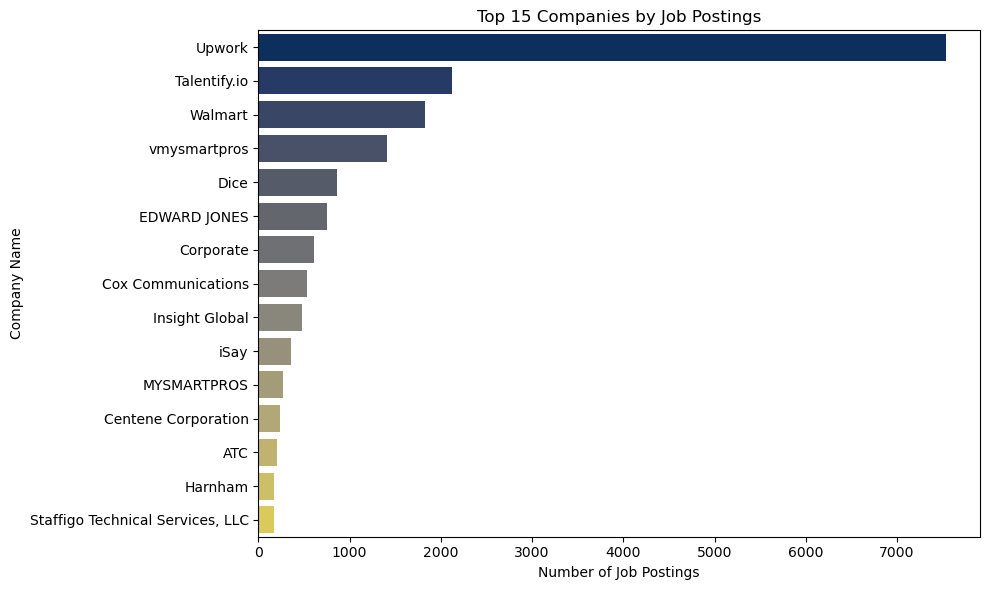

In [93]:
# Top 15 companies
top_15_company = company_counts.head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_company.values, y=top_15_company.index, palette='cividis')

plt.title('Top 15 Companies by Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

In [94]:
schedules_typ = df['schedule_type'].value_counts(dropna=False)
schedules_typ

schedule_type
Full-time                               45082
Contractor                               9284
Contractor and Temp work                 3130
Full-time and Part-time                  1187
Part-time                                1144
Internship                                516
Full-time and Contractor                  349
Full-time and Temp work                   283
NaN                                       246
Full-time and Internship                  192
Temp work                                 169
Full-time, Part-time, and Internship       92
Full-time, Contractor, and Temp work       85
Part-time, Contractor, and Temp work       47
Part-time and Contractor                   30
Volunteer                                  27
Part-time and Internship                   21
Full-time, Part-time, and Contractor       13
Temp work and Internship                    9
Part-time and Temp work                     9
Full-time and Per diem                      9
Full-time, Part-time

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_85805/315265865.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')


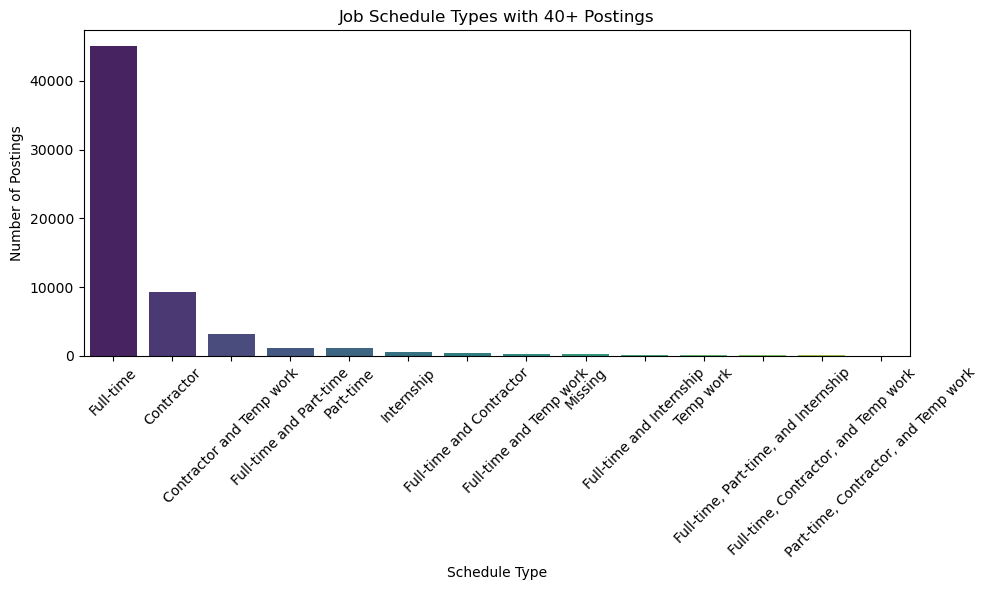

In [95]:
# Count values including NaNs and replace NaNs with 'Missing'
schedule_counts = df['schedule_type'].fillna('Missing').value_counts()

# Filter to only show types with 40 or more postings
filtered_counts = schedule_counts[schedule_counts >= 40]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')

plt.title('Job Schedule Types with 40+ Postings')
plt.xlabel('Schedule Type')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [96]:
# Fill NaN with empty string for easier splitting
df['schedule_type'] = df['schedule_type'].fillna("")

# Normalize separator to a single delimiter (some use commas, some "and")
df['schedule_type_clean'] = df['schedule_type'].str.replace(',', ' and')

# Split schedule types into individual labels
df['schedule_type_list'] = df['schedule_type_clean'].str.lower().str.split(' and ')

mlb = MultiLabelBinarizer()
schedule_dummies = pd.DataFrame(mlb.fit_transform(df['schedule_type_list']),
                                columns=[f'is_{x.strip().replace(" ", "_")}' for x in mlb.classes_],
                                index=df.index)

# Combine with original DataFrame
df = pd.concat([df, schedule_dummies], axis=1)

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_85805/1641517848.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=schedule_sums.values, y=schedule_sums.index, palette='mako')


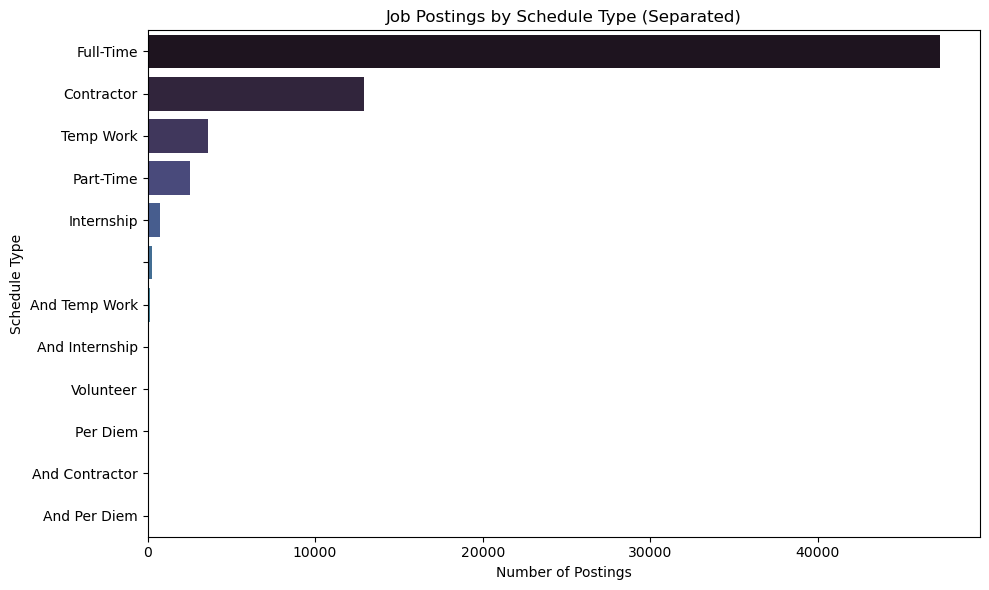

In [97]:
# Get only the one-hot encoded schedule columns
schedule_columns = [col for col in df.columns if col.startswith('is_')]

# Sum each column to count how many jobs include that type
schedule_sums = df[schedule_columns].sum().sort_values(ascending=False)

# Clean up column names for display (remove "is_")
schedule_sums.index = schedule_sums.index.str.replace('is_', '').str.replace('_', ' ').str.title()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=schedule_sums.values, y=schedule_sums.index, palette='mako')
plt.title('Job Postings by Schedule Type (Separated)')
plt.xlabel('Number of Postings')
plt.ylabel('Schedule Type')
plt.tight_layout()
plt.show()

In [98]:
# Filter numerical and categorical columns
numer_features = df.select_dtypes(include=['int64', 'float64']).columns
numer_features

Index(['Unnamed: 0', 'index', 'commute_time', 'salary_avg', 'salary_min',
       'salary_max', 'salary_hourly', 'salary_yearly', 'salary_standardized',
       'is_', 'is_and_contractor', 'is_and_internship', 'is_and_per_diem',
       'is_and_temp_work', 'is_contractor', 'is_full-time', 'is_internship',
       'is_part-time', 'is_per_diem', 'is_temp_work', 'is_volunteer'],
      dtype='object')

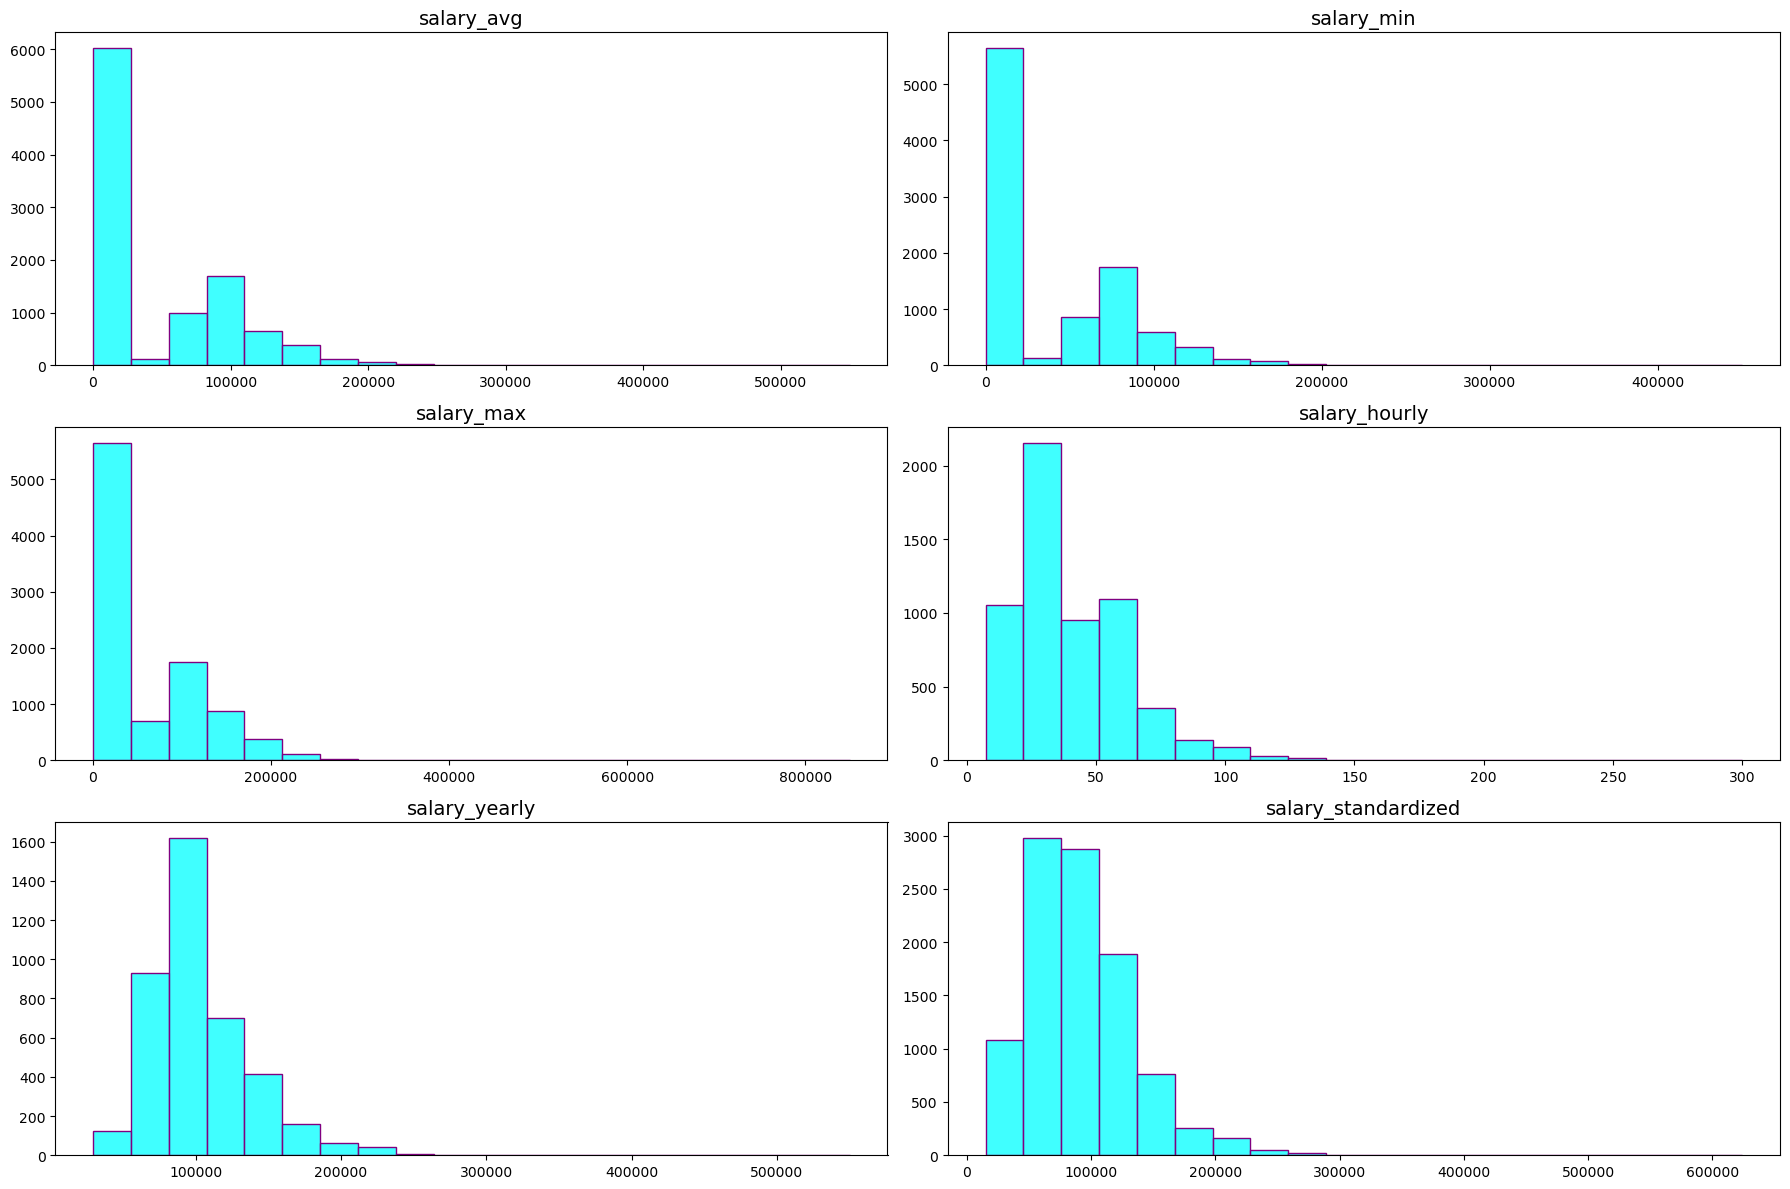

In [99]:
# Define numerical features to exclude
exclude_cols = ['Unnamed: 0', 'index', 'commute_time', 'is_', 'is_and_contractor', 
                'is_and_internship', 'is_and_per_diem', 'is_and_temp_work', 
                'is_contractor', 'is_full-time', 'is_internship', 'is_part-time', 
                'is_per_diem', 'is_temp_work', 'is_volunteer']

# Filter numerical features (assuming numer_features is already defined)
numer_features = [col for col in numer_features if col not in exclude_cols]

# Grid setup
n_cols = 2
n_rows = (len(numer_features) + 1) // n_cols  # Dynamic row calculation
plt.figure(figsize=(18, 12)) 

# Loop through and plot each numeric feature
for i, col in enumerate(numer_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=20, color='aqua', edgecolor='purple')
    plt.title(col, fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_85805/1776535307.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salary_rate_counts, x='count', y='salary_rate', palette='viridis')


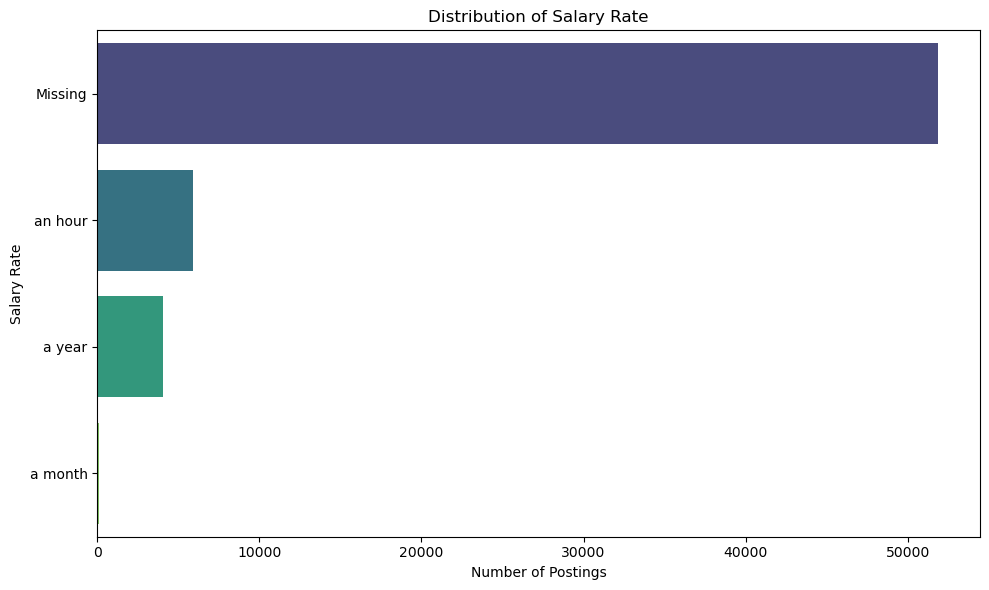

In [100]:
# Fill missing values in 'salary_rate' with 'Missing'
df['salary_rate'] = df['salary_rate'].fillna('Missing')

# Count the occurrences of each salary rate
salary_rate_counts = df['salary_rate'].value_counts().reset_index()
salary_rate_counts.columns = ['salary_rate', 'count']

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_rate_counts, x='count', y='salary_rate', palette='viridis')
plt.title('Distribution of Salary Rate')
plt.xlabel('Number of Postings')
plt.ylabel('Salary Rate')
plt.tight_layout()
plt.show()

# Bivariate Exploratory Analysis

In [101]:
# clean description column
df['clean_description'] = df['description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x).lower())) # convert into lowercase and removing punctuation/special characters


/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_85805/939614130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_schedule.values, y=avg_salary_by_schedule.index, palette='coolwarm')


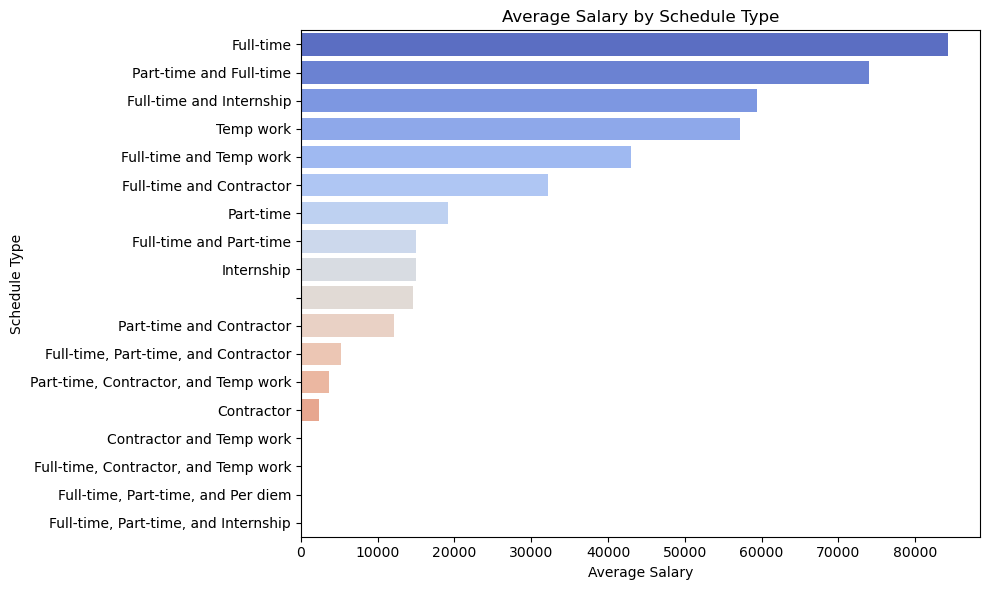

In [102]:

# Group by schedule type and calculate average salary
avg_salary_by_schedule = df.groupby('schedule_type')['salary_avg'].mean().dropna().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_schedule.values, y=avg_salary_by_schedule.index, palette='coolwarm')
plt.title('Average Salary by Schedule Type')
plt.xlabel('Average Salary')
plt.ylabel('Schedule Type')
plt.tight_layout()
plt.show()


In [103]:
columns_names

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

### Clean and standardize the salary_pay column

In [ ]:

def clean_salary_range(s):
    if pd.isna(s) or s == '':
        return np.nan

    # Convert to string and remove unwanted symbols
    s = str(s).replace('$', '').replace(',', '').lower()

    # Handle "K" notation (e.g., 90K)
    s = re.sub(r'(\d+)k', lambda m: str(float(m.group(1)) * 1000), s)

    # Split on common dash types
    parts = re.split(r'[\–\-]', s)  # en dash or hyphen

    try:
        # Convert both ends of range to float
        nums = [float(p.strip()) for p in parts if p.strip() != '']
        if len(nums) == 2:
            return sum(nums) / 2  # average
        elif len(nums) == 1:
            return nums[0]
    except:
        return np.nan

    return np.nan

# Apply function
df['salary_pay_cleaned'] = df['salary_pay'].apply(clean_salary_range)

# fill NaNs with mean
df['salary_pay_cleaned'] = df['salary_pay_cleaned'].fillna(df['salary_pay_cleaned'].mean())

def clean_salary_range(s):
    if pd.isna(s) or s == '':
        return np.nan

    # Convert to string and remove unwanted symbols
    s = str(s).replace('$', '').replace(',', '').lower()

    # Handle "K" notation (e.g., 90K)
    s = re.sub(r'(\d+)k', lambda m: str(float(m.group(1)) * 1000), s)

    # Split on common dash types
    parts = re.split(r'[\–\-]', s)  # en dash or hyphen

    try:
        # Convert both ends of range to float
        nums = [float(p.strip()) for p in parts if p.strip() != '']
        if len(nums) == 2:
            return sum(nums) / 2  # average
        elif len(nums) == 1:
            return nums[0]
    except:
        return np.nan

    return np.nan

# Apply function
df['salary_pay_cleaned'] = df['salary_pay'].apply(clean_salary_range)

# fill NaNs with mean
df['salary_pay_cleaned'] = df['salary_pay_cleaned'].fillna(df['salary_pay_cleaned'].mean())




/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_85805/1124073747.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_title.values, y=salary_by_title.index, palette='coolwarm')


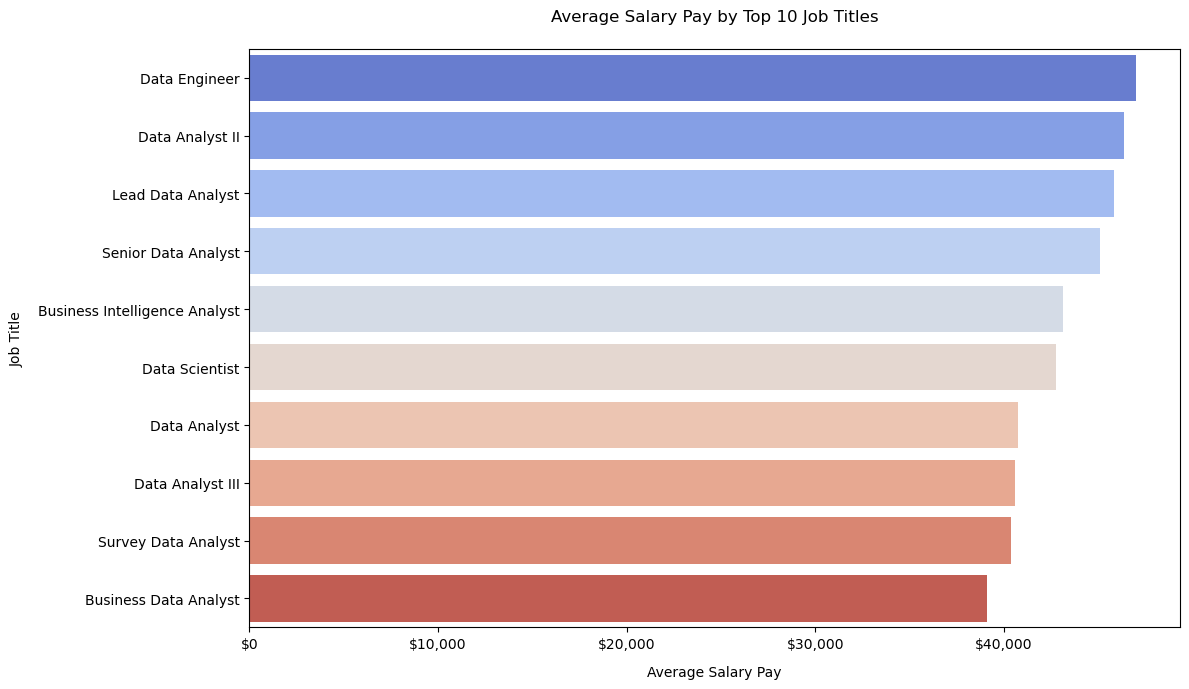

In [ ]:


# Limit to top 10 most frequent job titles
top_titles = df['title'].value_counts().head(10).index
df_top = df[df['title'].isin(top_titles)]

# Calculate average salary_pay_cleaned by job title - FIXED GROUPBY
salary_by_title = df_top.groupby('title')['salary_pay_cleaned'].mean().sort_values(ascending=False)

# Plotting - FIXED BARPLOT PARAMETERS
plt.figure(figsize=(12, 7))
sns.barplot(x=salary_by_title.values, y=salary_by_title.index, palette='coolwarm')

# Format x-axis to display currency
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))

plt.title('Average Salary Pay by Top 10 Job Titles', pad=20)
plt.xlabel('Average Salary Pay', labelpad=10)
plt.ylabel('Job Title', labelpad=10)
plt.tight_layout()
plt.show()


### Clean and standardize the salary_rate column

In [109]:
# Convert all text to lowercase and strip whitespace
df['salary_rate_cleaned'] = df['salary_rate'].str.lower().str.strip()
# Replace common variations with consistent terms
df['salary_rate_cleaned'] = df['salary_rate_cleaned'].replace({
    'an hour': 'hour',
    'a year': 'year',
    'per hour': 'hour',
    'per year': 'year',
    'hourly': 'hour',
    'yearly': 'year'
})
# Fill NaN with a default label if needed
df['salary_rate_cleaned'] = df['salary_rate_cleaned'].fillna('missing')

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_85805/1772007832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='salary_rate_cleaned', order=df['salary_rate_cleaned'].value_counts().index, palette='Set2')


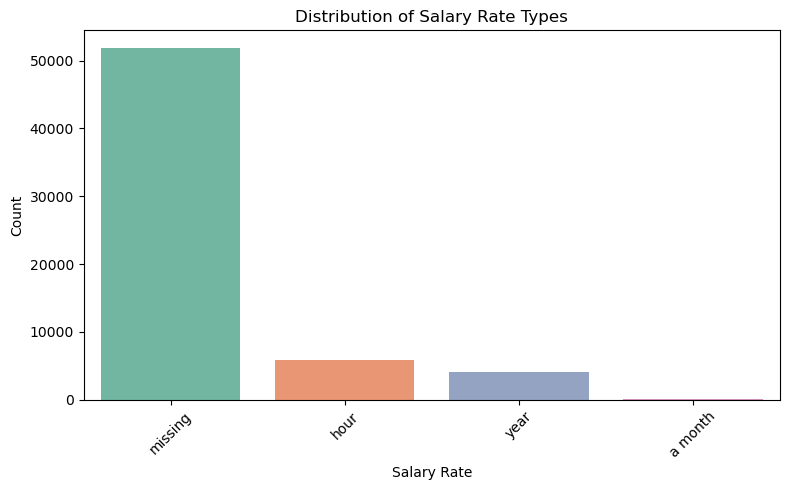

In [110]:
# Countplot of cleaned salary rate types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='salary_rate_cleaned', order=df['salary_rate_cleaned'].value_counts().index, palette='Set2')
plt.title('Distribution of Salary Rate Types')
plt.xlabel('Salary Rate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_85805/947986075.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['work_from_home'] = df['work_from_home'].fillna(False)
/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_85805/947986075.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_remote.index.astype(str), y=avg_salary_remote.values, palette='pastel')


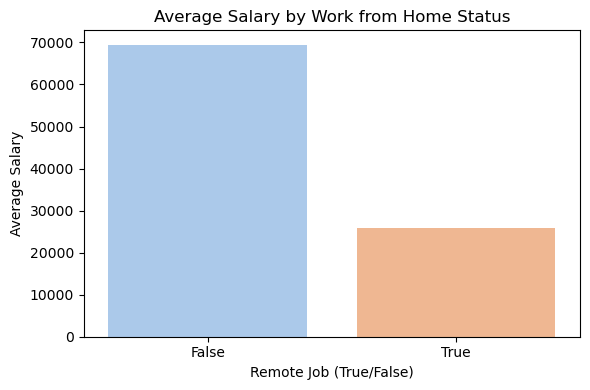

In [107]:
# Replace any NaNs in work_from_home with False or a neutral label
df['work_from_home'] = df['work_from_home'].fillna(False)

# Group and plot
avg_salary_remote = df.groupby('work_from_home')['salary_avg'].mean().dropna()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_salary_remote.index.astype(str), y=avg_salary_remote.values, palette='pastel')
plt.title('Average Salary by Work from Home Status')
plt.xlabel('Remote Job (True/False)')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()


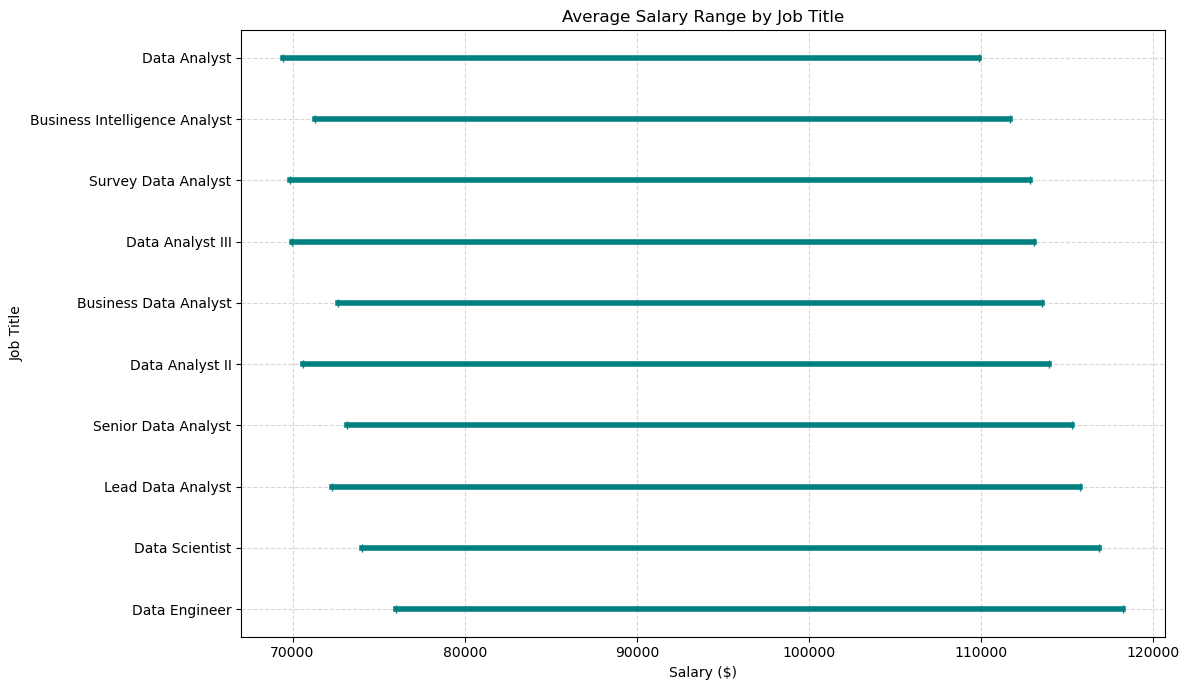

In [118]:
# Convert salary_rate to lowercase and strip whitespace
df['salary_rate_cleaned'] = df['salary_rate'].str.lower().str.strip()

# Convert salary_min and salary_max to numeric
df['salary_min'] = pd.to_numeric(df['salary_min'], errors='coerce')
df['salary_max'] = pd.to_numeric(df['salary_max'], errors='coerce')

# Convert hourly salaries to yearly
hourly_mask = df['salary_rate_cleaned'] == 'an hour'
df.loc[hourly_mask, 'salary_min'] = df.loc[hourly_mask, 'salary_min'] * 40 * 52
df.loc[hourly_mask, 'salary_max'] = df.loc[hourly_mask, 'salary_max'] * 40 * 52

# Fill NaNs with average values (optional)
df['salary_min'] = df['salary_min'].fillna(df['salary_min'].mean())
df['salary_max'] = df['salary_max'].fillna(df['salary_max'].mean())

# Limit to top job titles
top_titles = df['title'].value_counts().head(10).index
df_top = df[df['title'].isin(top_titles)]

# Calculate average salary_min and salary_max for each title
salary_range = df_top.groupby('title')[['salary_min', 'salary_max']].mean().sort_values(by='salary_max', ascending=False)

# Plot
plt.figure(figsize=(12, 7))
for i, (index, row) in enumerate(salary_range.iterrows()):
    plt.plot([row['salary_min'], row['salary_max']], [index, index], marker='|', color='teal', linewidth=4)

plt.title('Average Salary Range by Job Title')
plt.xlabel('Salary ($)')
plt.ylabel('Job Title')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Multivariate Exploratory Analysis

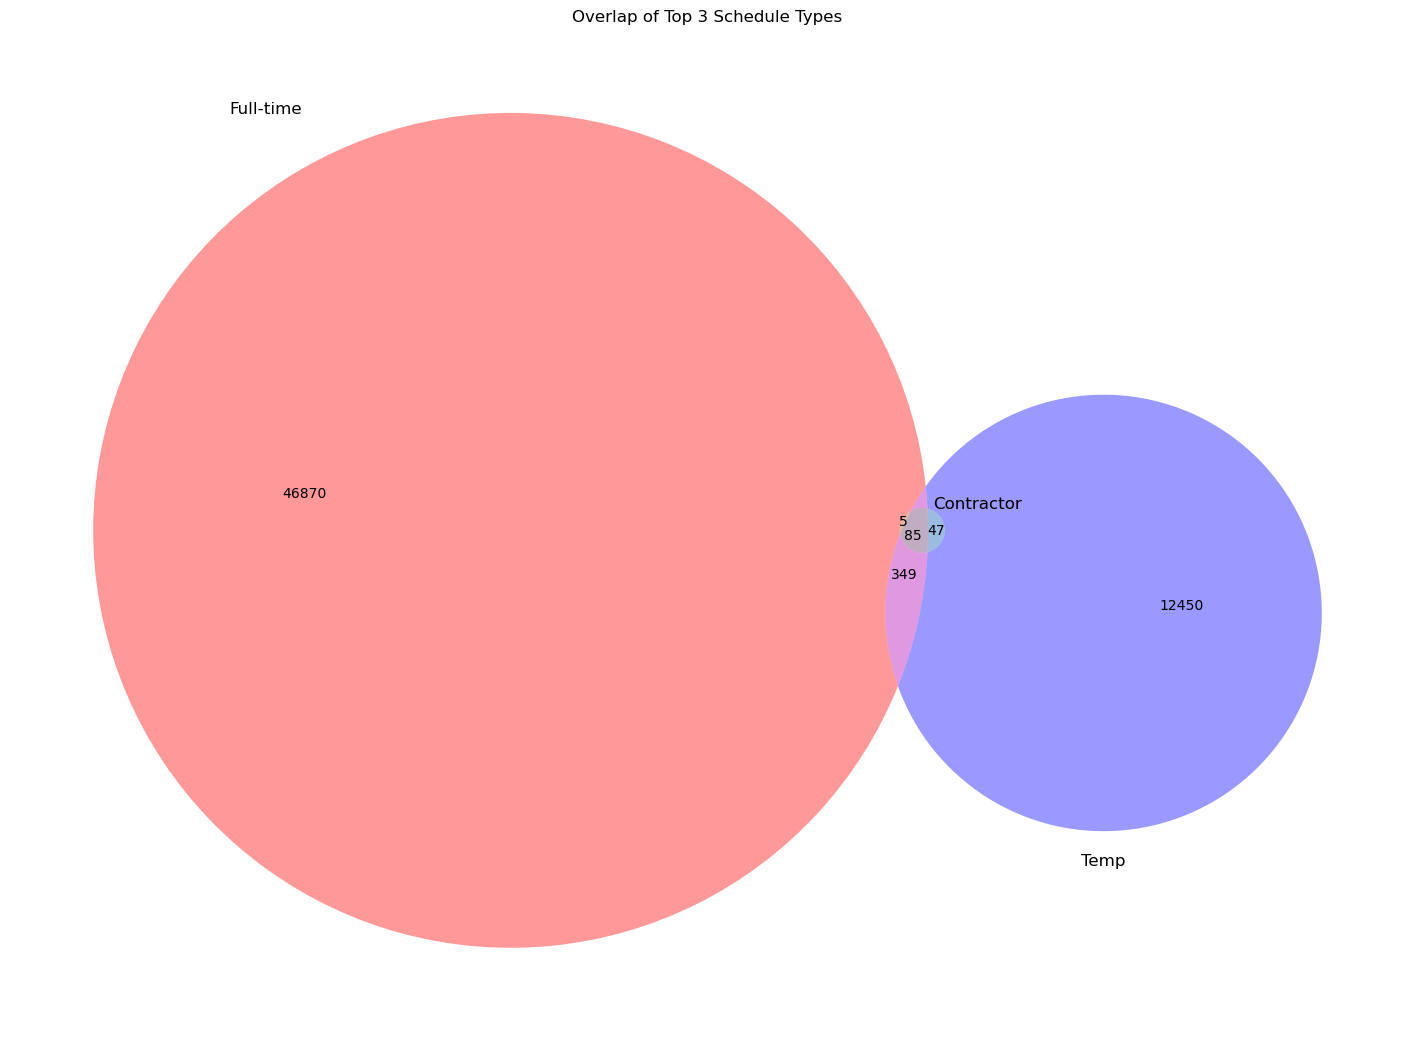

In [108]:
# Create sets of row indices for each schedule type
set_full_time = set(df[df['is_full-time'] == 1].index)
set_contractor = set(df[df['is_contractor'] == 1].index)
set_temp = set(df[df['is_and_temp_work'] == 1].index)
# Plot the Venn diagram
plt.figure(figsize=(18, 16))
venn3([set_full_time, set_temp, set_contractor],
      set_labels=('Full-time', 'Contractor', 'Temp'))

plt.title('Overlap of Top 3 Schedule Types')
plt.show()